In [1]:
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns; sns.set()
import numpy as np
import h5py

import pandas as pd

from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from pandas.tools.plotting import parallel_coordinates

from sklearn.svm import SVC # "Support vector classifier"

from sklearn.metrics import jaccard_similarity_score

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

random_state = 100
import xgboost as xgb

import pickle
import matplotlib.pyplot as plt

In [2]:
#IMPORT DATA
train_dataset = h5py.File('train_signing.h5', "r")
train_set_x_orig = np.array(train_dataset["train_set_x"][:6150]) # your train set features
train_set_y_orig = np.array(train_dataset["train_set_y"][:6150]) # your train set labels

test_dataset = h5py.File('test_signing.h5', "r")
test_set_x_orig = np.array(test_dataset["test_set_x"][:1655]) # your test set features
test_set_y_orig = np.array(test_dataset["test_set_y"][:1655]) # your test set labels

train_set_y_orig = train_set_y_orig.reshape(train_set_x_orig.shape[0], 1)
test_set_y_orig = test_set_y_orig.reshape(test_set_x_orig.shape[0], 1)

In [3]:
# Reshape the training and test examples 
train_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten.T
test_x = test_x_flatten.T
train_y = train_set_y_orig
test_y = test_set_y_orig

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))

print("test_y's shape: " + str(test_y.shape))
print ("labels shape: " + str(train_y.shape))
#print("particular example: " + str(test_x_flatten[:, index]))
print(train_x.dtype)

train_x's shape: (6150, 14)
test_x's shape: (1655, 14)
test_y's shape: (1655, 1)
labels shape: (6150, 1)
float64


0.5

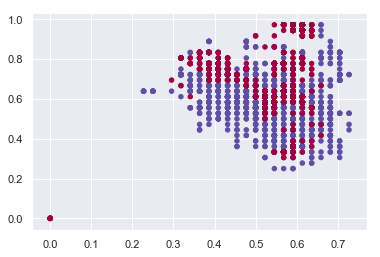

In [4]:
#plotting the positions of the right wrist or a different feature
plt.scatter(train_x[:, 12], train_x[:, 13], c=train_y[:,0], s=20, cmap=plt.cm.Spectral);
train_x[0, 0]

In [5]:
# strarting pca
pca = sklearnPCA(n_components=2) #2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(train_x))


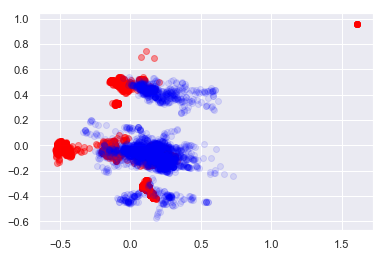

In [6]:
plt.scatter(transformed[train_y==0][0], transformed[train_y==0][1], label='Class 1', c='red', alpha=0.4)
plt.scatter(transformed[train_y==1][0], transformed[train_y==1][1], label='Class 2', c='blue', alpha=0.1)

### SVM

In [ ]:
## try SVM linear
model = SVC(kernel='linear', C=1E10)
model.fit(train_x, train_y)
#measure accuracy
print('train accuracy: '+str(jaccard_similarity_score(model.predict(train_x), train_y)))
print('test accuracy: '+str(jaccard_similarity_score(model.predict(test_x), test_y)))

# create roc curve
probs = model.predict(test_x)
preds = probs
fpr, tpr, threshold = metrics.roc_curve(test_y, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
## SVM rbf
test_y = np.ravel(test_y)
train_y = np.ravel(train_y)

model2 = SVC(kernel='rbf', C=1E10)
#model2 = SVC(kernel='rbf')
model2.fit(train_x, train_y)
print('train accuracy: '+str(jaccard_similarity_score(model2.predict(train_x), train_y)))
print('test accuracy: '+str(jaccard_similarity_score(model2.predict(test_x), test_y)))

# create roc curve
probs = model2.predict(test_x)
preds = probs
fpr, tpr, threshold = metrics.roc_curve(test_y, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
## SVM sigmoid
model3 = SVC(kernel='sigmoid')
model3.fit(train_x, train_y)
print('train accuracy: '+str(jaccard_similarity_score(model3.predict(train_x), train_y)))
print('test accuracy: '+str(jaccard_similarity_score(model3.predict(test_x), test_y)))

# create roc curve
probs = model3.predict(test_x)
preds = probs
fpr, tpr, threshold = metrics.roc_curve(test_y, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
## SVM polynomial
model4 = SVC(kernel='poly', gamma = 14)
model4.fit(train_x, train_y)
print('train accuracy: '+str(jaccard_similarity_score(model4.predict(train_x), train_y)))
print('test accuracy: '+str(jaccard_similarity_score(model4.predict(test_x), test_y)))

# create roc curve
probs = model4.predict(test_x)
preds = probs
fpr, tpr, threshold = metrics.roc_curve(test_y, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:
## testing SVM optimization
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

#adjust label sets to fit functions

test_y = np.ravel(test_y)
train_y = np.ravel(train_y)


C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(train_x, train_y)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

# Now we need to fit a classifier for all parameters in the 2d version
# (we use a smaller set of parameters here because it takes a while to train)

C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(test_x, test_set_y_orig.T)
        classifiers.append((C, gamma, clf))

In [ ]:
## another svm optimization

import optunity
import optunity.metrics

# k nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
# support vector machine classifier
from sklearn.svm import SVC
# Naive Bayes
from sklearn.naive_bayes import GaussianNB
# Random Forest
from sklearn.ensemble import RandomForestClassifier


data = train_x
labels = train_y

def train_svm(data, labels, kernel, C, gamma, degree, coef0):
    """A generic SVM training function, with arguments based on the chosen kernel."""
    if kernel == 'linear':
        model = SVC(kernel=kernel, C=C)
    elif kernel == 'poly':
        model = SVC(kernel=kernel, C=C, degree=degree, coef0=coef0)
    elif kernel == 'rbf':
        model = SVC(kernel=kernel, C=C, gamma=gamma)
    else:
        raise ArgumentError("Unknown kernel function: %s" % kernel)
    model.fit(data, labels)
    return model

search = {'algorithm': {'k-nn': {'n_neighbors': [1, 5]},
                        'SVM': {'kernel': {'linear': {'C': [0, 2]},
                                           'rbf': {'gamma': [0, 1], 'C': [0, 10]},
                                           'poly': {'degree': [2, 5], 'C': [0, 50], 'coef0': [0, 1]}
                                           }
                                },
                        'naive-bayes': None,
                        'random-forest': {'n_estimators': [10, 30],
                                          'max_features': [5, 20]}
                        }
         }

@optunity.cross_validated(x=data, y=labels, num_folds=5)
def performance(x_train, y_train, x_test, y_test,
                algorithm, n_neighbors=None, n_estimators=None, max_features=None,
                kernel=None, C=None, gamma=None, degree=None, coef0=None):
    # fit the model
    if algorithm == 'k-nn':
        model = KNeighborsClassifier(n_neighbors=int(n_neighbors))
        model.fit(x_train, y_train)
    elif algorithm == 'SVM':
        model = train_svm(x_train, y_train, kernel, C, gamma, degree, coef0)
    elif algorithm == 'naive-bayes':
        model = GaussianNB()
        model.fit(x_train, y_train)
    elif algorithm == 'random-forest':
        model = RandomForestClassifier(n_estimators=int(n_estimators),
                                       max_features=int(max_features))
        model.fit(x_train, y_train)
    else:
        raise ArgumentError('Unknown algorithm: %s' % algorithm)

    # predict the test set
    if algorithm == 'SVM':
        predictions = model.decision_function(x_test)
    else:
        predictions = model.predict_proba(test_x)[:, 1]
        

    return optunity.metrics.roc_auc(test_y, predictions, positive=True)
    


In [ ]:
performance(algorithm='k-nn', n_neighbors=7)

### Random Forest

C:\Users\varg_\AppData\Local\conda\conda\envs\tensorflow35\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


train accuracy: 0.9913821138211382
test accuracy: 0.8658610271903323


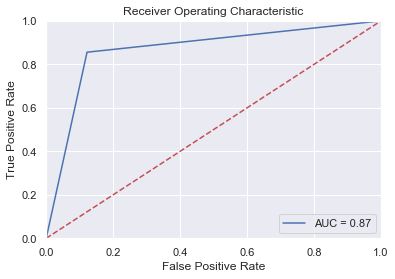

In [7]:
# random forest
model5 = RandomForestClassifier(n_estimators=2000 ,min_samples_split= 10,n_jobs=-1, random_state=100)
model5.fit(train_x, train_y)
print('train accuracy: '+str(jaccard_similarity_score(model5.predict(train_x), train_y)))
print('test accuracy: '+str(jaccard_similarity_score(model5.predict(test_x), test_y)))

# create roc curve
probs = model5.predict(test_x)
preds = probs
fpr, tpr, threshold = metrics.roc_curve(test_y, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [8]:
# Optimized random forest
from scipy.stats import randint as sp_randint

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, make_scorer
from time import time

# initialize the classifier
clf_RF = RandomForestClassifier(n_estimators=2000, n_jobs=-1, random_state=random_state)

# find the number of features for parameter optimization
num_features = train_x.shape[1]

# make scorer
auc_scorer = make_scorer(roc_auc_score, needs_threshold=True)#, needs_proba=True

# params
m_depths = [None] + list(range(2, 21, 3))

# specify parameters and distributions to sample from
param_dist_rf = {"max_depth": m_depths, # [None, 2, 5, 8, 11, 14, 17, 20]
                 "max_features": sp_randint(1, num_features),
                 "min_samples_split": sp_randint(2, 100),
                 "min_samples_leaf": sp_randint(1, 100),
                 "bootstrap": [True, False],
                 "criterion": ["gini", "entropy"]}

n_iter_search = 30 # was 20

# run randomized search
random_search_RF = RandomizedSearchCV(clf_RF, 
                                      param_distributions=param_dist_rf,
                                      n_iter=n_iter_search,
                                      scoring=auc_scorer,
                                      random_state=random_state,
                                      n_jobs=-1,
                                      return_train_score=True)

start = time()
random_search_RF.fit(train_x, train_y)
print("RandomizedSearchCV took {:.2f} seconds for {} candidates"
      " parameter settings.\n".format((time() - start), n_iter_search))

# display the dataframe without the parameters column for better rendering
display(pd.DataFrame(random_search_RF.cv_results_).drop('params', axis=1))

best_parameters_RF = pd.Series(random_search_RF.best_params_)

# display the best set of parameters
display(best_parameters_RF)

C:\Users\varg_\AppData\Local\conda\conda\envs\tensorflow35\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV took 526.56 seconds for 30 candidates parameter settings.



,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_bootstrap,param_criterion,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,...,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,10.585609,1.583094,0.819484,0.984876,True,gini,8,8,88,81,...,0.824733,0.983046,0.914299,0.979286,0.719370,0.992297,1.361150,0.338971,0.079656,0.005467
1,12.619778,1.349893,0.812207,0.984861,True,gini,17,5,99,55,...,0.845745,0.983921,0.917562,0.978510,0.673231,0.992152,1.275324,0.163207,0.102518,0.005609
2,14.010513,1.847610,0.799288,0.996637,True,gini,17,3,25,17,...,0.809743,0.997256,0.923667,0.994889,0.664385,0.997765,1.783981,0.481777,0.106096,0.001253
3,22.786566,1.810134,0.854632,0.997748,True,entropy,11,11,17,11,...,0.874580,0.998009,0.934968,0.996729,0.754289,0.998507,1.891816,0.417859,0.075091,0.000749
4,28.576046,2.562208,0.815119,0.991454,False,gini,5,12,5,33,...,0.868176,0.988463,0.876349,0.989570,0.700750,0.996328,0.248091,0.298968,0.080910,0.003476
5,16.896692,1.401531,0.815543,0.998289,False,entropy,14,4,5,93,...,0.810336,0.998452,0.914295,0.997408,0.721955,0.999009,4.139645,0.300113,0.078599,0.000664
6,14.661329,1.784645,0.785622,0.995838,False,entropy,20,2,48,67,...,0.799050,0.996522,0.920399,0.993544,0.637337,0.997447,1.151571,0.655654,0.115935,0.001665
7,20.363344,1.785983,0.834626,0.990144,False,gini,20,8,81,4,...,0.839345,0.989250,0.926357,0.986815,0.738127,0.994367,0.444181,0.543807,0.076908,0.003147
8,14.907303,1.370549,0.801416,0.990833,False,entropy,17,4,99,65,...,0.795480,0.990819,0.918069,0.986842,0.690647,0.994839,0.328473,0.537333,0.092928,0.003265
9,15.812720,1.757960,0.784243,0.997578,False,entropy,None,2,31,50,...,0.797983,0.998010,0.915592,0.996393,0.639078,0.998332,0.973449,0.523189,0.113290,0.000848


bootstrap               True
criterion            entropy
max_depth                 11
max_features              11
min_samples_leaf          17
min_samples_split         11
dtype: object

C:\Users\varg_\AppData\Local\conda\conda\envs\tensorflow35\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


train accuracy: 0.9707317073170731
test accuracy: 0.8489425981873112


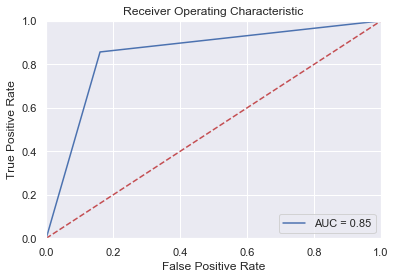

In [9]:
# most optimized random forest
model7 = RandomForestClassifier(n_estimators=2000 ,
                                min_samples_split= 11,
                                min_samples_leaf=17,
                                bootstrap = True,
                                criterion = 'entropy',
                                max_depth = 11,
                                max_features = 11,
                                n_jobs=-1,
                                random_state=100)
model7.fit(train_x, train_y)
print('train accuracy: '+str(jaccard_similarity_score(model7.predict(train_x), train_y)))
print('test accuracy: '+str(jaccard_similarity_score(model7.predict(test_x), test_y)))

# create roc curve
probs = model7.predict(test_x)
preds = probs
fpr, tpr, threshold = metrics.roc_curve(test_y, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### XGBooster

In [10]:
best_params = {"eta": None,
               "min_child_weight": None,
               "gamma": None,
               "max_depth": None,
               "max_delta_step": None,
               "subsample": None,
               "colsample_bytree": None,
               "lambda": None,
               "objective": None}

number_of_iterations = {"after_tree_params": None,
                        "after_reg_params": None,
                        "after_function_param": None,
                        "after_eta": None}

In [11]:
np.random.seed(random_state)

best_score = 0.0

num_iterations = 20

max_iterations = []

# get data into the correct format
xgbData = xgb.DMatrix(train_x, label=train_y)

# prepare parameters
maxDepths = np.random.randint(3, 40, size=num_iterations)
minChildWeights = np.random.randint(0, 40, size=num_iterations)
gammas = np.random.randint(3, 50, size=num_iterations)
maxDeltaStep = np.random.randint(0, 10, size=num_iterations)

params_tupled = [(a, b, c, d) for a, b, c, d in zip(maxDepths,
                                                    minChildWeights,
                                                    gammas,
                                                    maxDeltaStep)]

# specify parameters and distributions to sample from
param_dist_XGB = {"eta": 0.3,
                  "min_child_weight": 1.0,
                  "gamma": 0.0,
                  "max_depth": 20,
                  "max_delta_step": 0.0,
                  "subsample": 0.8,
                  "colsample_bytree": 0.8,
                  "lambda": 1,
                  "objective": "binary:logistic"}

for mD, mCW ,g ,mDS in params_tupled:
    
    param_dist_XGB["max_depth"] = mD
    param_dist_XGB["min_child_weight"] = mCW
    param_dist_XGB["gamma"] = g
    param_dist_XGB["max_delta_step"] = mDS

    # get a cross validated result
    cv_XGB = xgb.cv(param_dist_XGB,
                    xgbData,
                    num_boost_round=300,
                    seed=random_state,
                    nfold=5,
                    stratified=True,
                    metrics={'auc'},
                    early_stopping_rounds=30,
                    as_pandas=True,
                    shuffle=False)
    
    # get the smallest score
    mean_auc_test_score = cv_XGB['test-auc-mean'].max()
    
    print("The highest auc score of the cross validation is {}.".format(mean_auc_test_score))
    
    if mean_auc_test_score < 0.85:
        print(" -> its params were: max_depth={}, min_child_weight={}, gamma={}, max_delta_step={}"
              .format(mD, mCW, g, mDS))
    
    max_iterations.append(cv_XGB.index.values[-1] + 1)
    
    if mean_auc_test_score > best_score:
        
        # update the smallest error
        best_score = mean_auc_test_score
        # update best parameters
        best_params["max_depth"] = mD
        best_params["min_child_weight"] = mCW
        best_params["gamma"] = g
        best_params["max_delta_step"] = mDS

number_of_iterations["after_tree_params"] = max(max_iterations)

print()
print("The optimal max_depth was found to be: {}".format(best_params["max_depth"]))
print("The optimal min_child_weight was found to be: {}".format(best_params["min_child_weight"]))
print("The optimal gamma was found to be: {}".format(best_params["gamma"]))
print("The optimal max_delta_step was found to be: {}\n".format(best_params["max_delta_step"]))

print("The best auc score for the best tree parameters is {}.\n".format(best_score))

print("The number of iterations for the train cases were {}, and the max of them is {}."
      .format(max_iterations, number_of_iterations["after_tree_params"]))

The highest auc score of the cross validation is 0.9833802.
The highest auc score of the cross validation is 0.9911757999999999.
The highest auc score of the cross validation is 0.9825766.
The highest auc score of the cross validation is 0.9863312000000001.
The highest auc score of the cross validation is 0.9874768000000002.
The highest auc score of the cross validation is 0.9857766000000001.
The highest auc score of the cross validation is 0.9867096.
The highest auc score of the cross validation is 0.9987418.
The highest auc score of the cross validation is 0.9852838.
The highest auc score of the cross validation is 0.9969262000000001.
The highest auc score of the cross validation is 0.9947148.
The highest auc score of the cross validation is 0.9974632.
The highest auc score of the cross validation is 0.9940213999999999.
The highest auc score of the cross validation is 0.9876454000000001.
The highest auc score of the cross validation is 0.9893430000000001.
The highest auc score of the

In [12]:
best_score = 0.0

num_iterations = 20

max_iterations = []

# prepare parameters
subsampleParam = np.random.uniform(0.1, 1, size=num_iterations)
colsample_bytreeParam = np.random.uniform(0.1, 1, size=num_iterations)
lambdaParam = np.random.randint(1, 5, size=num_iterations)

params_tupled = [(a, b, c) for a, b, c in zip(subsampleParam,
                                              colsample_bytreeParam,
                                              lambdaParam)]

# specify parameters and distributions to sample from
param_dist_XGB = {"eta": 0.3,
                  "min_child_weight": best_params["min_child_weight"],
                  "gamma": best_params["gamma"],
                  "max_depth": best_params["max_depth"],
                  "max_delta_step": best_params["max_delta_step"],
                  "subsample": 0.8,
                  "colsample_bytree": 0.8,
                  "lambda": 1,
                  "objective": "binary:logistic"}

for ss, csbt ,l in params_tupled:
    
    param_dist_XGB["subsample"] = ss
    param_dist_XGB["colsample_bytree"] = csbt
    param_dist_XGB["lambda"] = l

    # get a cross validated result
    cv_XGB = xgb.cv(param_dist_XGB,
                    xgbData,
                    num_boost_round=300,
                    seed=random_state,
                    nfold=5,
                    stratified=True,
                    metrics={'auc'},
                    early_stopping_rounds=30,
                    as_pandas=True,
                    shuffle=False)
    
    # get the smallest score
    mean_auc_test_score = cv_XGB['test-auc-mean'].max()
    
    print("The smallest auc score of the cross validation is {}.".format(mean_auc_test_score))
    
    if mean_auc_test_score < 0.85:
        print("  -> its parameters were: subsample={}, colsample_bytree={}, lambda={}."
              .format(ss, csbt, l))
        
    max_iterations.append(cv_XGB.index.values[-1] + 1)
    
    if mean_auc_test_score > best_score:
        
        # update the smallest error
        best_score = mean_auc_test_score
        # update best parameters
        best_params["subsample"] = ss
        best_params["colsample_bytree"] = csbt
        best_params["lambda"] = l

number_of_iterations["after_reg_params"] = max(max_iterations)

print()
print("The optimal subsample was found to be: {}".format(best_params["subsample"]))
print("The optimal colsample_bytree was found to be: {}".format(best_params["colsample_bytree"]))
print("The optimal lambda was found to be: {}\n".format(best_params["lambda"]))

print("The best auc score for the best tree parameters is {}.\n".format(best_score))

print("The number of iterations for the train cases were {}, and the max of them is {}."
      .format(max_iterations, number_of_iterations["after_reg_params"]))

The smallest auc score of the cross validation is 0.9983220000000002.
The smallest auc score of the cross validation is 0.9971226.
The smallest auc score of the cross validation is 0.9982506000000001.
The smallest auc score of the cross validation is 0.9987444.
The smallest auc score of the cross validation is 0.9897988.
The smallest auc score of the cross validation is 0.9962226000000001.
The smallest auc score of the cross validation is 0.9926345999999999.
The smallest auc score of the cross validation is 0.9986878000000001.
The smallest auc score of the cross validation is 0.9956938000000001.
The smallest auc score of the cross validation is 0.9919974.
The smallest auc score of the cross validation is 0.9985231999999999.
The smallest auc score of the cross validation is 0.9973706.
The smallest auc score of the cross validation is 0.995321.
The smallest auc score of the cross validation is 0.9953901999999999.
The smallest auc score of the cross validation is 0.9892899999999999.
The s

In [13]:
best_score = 0.0

max_iterations = []

params_tupled = ["binary:logistic", "binary:logitraw"]

# specify parameters and distributions to sample from
param_dist_XGB = {"eta": 0.3,
                  "min_child_weight": best_params["min_child_weight"],
                  "gamma": best_params["gamma"],
                  "max_depth": best_params["max_depth"],
                  "max_delta_step": best_params["max_delta_step"],
                  "subsample": best_params["subsample"],
                  "colsample_bytree": best_params["colsample_bytree"],
                  "lambda": best_params["lambda"],
                  "objective": None}

for func in params_tupled:
    
    param_dist_XGB["objective"] = func

    # get a cross validated result
    cv_XGB = xgb.cv(param_dist_XGB,
                    xgbData,
                    num_boost_round=300,
                    seed=random_state,
                    nfold=5,
                    stratified=True,
                    metrics={'auc'},
                    early_stopping_rounds=30,
                    as_pandas=True,
                    shuffle=False)
    
    # get the smallest score
    mean_auc_test_score = cv_XGB['test-auc-mean'].max()
    
    print("The smallest auc score of the cross validation is {}.".format(mean_auc_test_score))
    
    if mean_auc_test_score < 0.85:
        print("  -> its parameters were: function={}."
              .format(func))
        
    max_iterations.append(cv_XGB.index.values[-1] + 1)
    
    if mean_auc_test_score > best_score:
        
        # update the smallest error
        best_score = mean_auc_test_score
        # update best parameters
        best_params["objective"] = func

number_of_iterations["after_function_param"] = max(max_iterations)

print()
print("The optimal function was found to be: {}\n".format(best_params["objective"]))

print("The best auc score for the best tree parameters is {}.".format(best_score))

print("The number of iterations for the train cases were {}, and the max of them is {}."
      .format(max_iterations, number_of_iterations["after_function_param"]))

The smallest auc score of the cross validation is 0.9987982000000001.
The smallest auc score of the cross validation is 0.9987982000000001.

The optimal function was found to be: binary:logistic

The best auc score for the best tree parameters is 0.9987982000000001.
The number of iterations for the train cases were [99, 99], and the max of them is 99.


In [14]:
best_score = 0.0

max_iterations = []

#params_tupled = np.arange(0.005, 0.5, 0.02)
params_tupled = np.arange(0.05, 1.0, 0.02)

# specify parameters and distributions to sample from
param_dist_XGB = {"eta": 0.1,
                  "min_child_weight": best_params["min_child_weight"],
                  "gamma": best_params["gamma"],
                  "max_depth": best_params["max_depth"],
                  "max_delta_step": best_params["max_delta_step"],
                  "subsample": best_params["subsample"],
                  "colsample_bytree": best_params["colsample_bytree"],
                  "lambda": best_params["lambda"],
                  "objective": best_params["objective"]}

for eta in params_tupled:
    
    param_dist_XGB["eta"] = eta

    # get a cross validated result
    cv_XGB = xgb.cv(param_dist_XGB,
                    xgbData,
                    num_boost_round=300,
                    seed=random_state,
                    nfold=5,
                    stratified=True,
                    metrics={'auc'},
                    early_stopping_rounds=30,
                    as_pandas=True,
                    shuffle=False)
    
    # get the smallest score
    mean_auc_test_score = cv_XGB['test-auc-mean'].max()
    
    print("The smallest auc score of the cross validation is {}.".format(mean_auc_test_score))
    
    if mean_auc_test_score < 0.85:
        print("The eta was {}.".format(eta))
        
    max_iterations.append(cv_XGB.index.values[-1] + 1)
    
    if mean_auc_test_score > best_score:
        
        # update the smallest error
        best_score = mean_auc_test_score
        # update best parameters
        best_params["eta"] = eta

number_of_iterations["after_eta"] = max(max_iterations)

print()
print("The eta parameter was found to be: {}\n".format(best_params["eta"]))

print("The best auc score for the best tree parameters is {}.".format(best_score))

print("The number of iterations for the train cases were {}, and the max of them is {}."
      .format(max_iterations, number_of_iterations["after_eta"]))

The smallest auc score of the cross validation is 0.9987142.
The smallest auc score of the cross validation is 0.9987254.
The smallest auc score of the cross validation is 0.9987154.
The smallest auc score of the cross validation is 0.9987619999999999.
The smallest auc score of the cross validation is 0.9986996000000001.
The smallest auc score of the cross validation is 0.9987048.
The smallest auc score of the cross validation is 0.9987584.
The smallest auc score of the cross validation is 0.9986013999999999.
The smallest auc score of the cross validation is 0.9987906000000001.
The smallest auc score of the cross validation is 0.9988252.
The smallest auc score of the cross validation is 0.9986801999999999.
The smallest auc score of the cross validation is 0.9987068000000001.
The smallest auc score of the cross validation is 0.9985968.
The smallest auc score of the cross validation is 0.9986436000000001.
The smallest auc score of the cross validation is 0.9987682.
The smallest auc score

In [15]:
# might be wrong
best_clf_XGB = xgb
#best_clf_XGB = xgb.Booster(best_params)

# .Booster(
#                         #n_estimators=number_of_iterations["after_function_param"]+5,
#                    learning_rate=best_params["eta"],
#                    min_child_weight=best_params["min_child_weight"],
#                    gamma=best_params["gamma"],
#                    max_depth=best_params["max_depth"],
#                    max_delta_step=best_params["max_delta_step"],
#                    subsample=best_params["subsample"],
#                    colsample_bytree=best_params["colsample_bytree"],
#                    reg_lambda=best_params["lambda"],
#                                  objective=best_params["objective"],
#                                  random_state=0, n_jobs=-1)

print("The best XGB classifier is:\n\n{}\n".format(best_clf_XGB))

The best XGB classifier is:

<module 'xgboost' from 'C:\\Users\\varg_\\AppData\\Local\\conda\\conda\\envs\\tensorflow35\\lib\\site-packages\\xgboost\\__init__.py'>



In [16]:
print("The best set of parameters for the XGB classifier are:\n")

display(pd.Series(best_params))

The best set of parameters for the XGB classifier are:



colsample_bytree            0.90137
eta                            0.23
gamma                             3
lambda                            2
max_delta_step                    4
max_depth                        37
min_child_weight                  4
objective           binary:logistic
subsample                  0.980761
dtype: object

In [17]:
from scipy import interp
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
from sklearn.metrics import roc_curve, auc

np.set_printoptions(threshold=400)

def make_and_plot_AUROC(clf, X, y, n_folds=10, RF=True, shuffle=True, save_name=''):
    """ Calculates the mean AUROC and plots it."""

    start = time()
    
    # initialize the cross validation object for 10 folds
    cv = StratifiedKFold(n_splits=n_folds, shuffle=shuffle, random_state=0)

    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    feature_scores = []

    fig = plt.figure()
    ax = plt.subplot(111)

    fig.set_figwidth(8)
    fig.set_figheight(6)

    i = 0
    for train, test in cv.split(X, y):
        
        if RF:
            probas_ = clf.fit(X[train], y[train]).predict_proba(X[test])
        else:
            # prep the data
            data_train = xgb.DMatrix(X[train], label=y[train])
            data_test = xgb.DMatrix(X[test], label=y[test])
                        
            # get the booster instance after training
            model = clf.train(best_params, data_train, 
                              number_of_iterations["after_function_param"]+5)
            
            # get the predictions
            probas_ = model.predict(data_test)
            
            # turn the predictions into correct format
            probas_ = np.array([(1-x, x) for x in probas_])
            
        # Compute ROC curve and area under the curve
        fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1], pos_label=1)
        tprs.append(interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

        i += 1
    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Luck', alpha=.8)

    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)
    std_auc = np.std(aucs)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
             lw=2, alpha=.8)

    std_tpr = np.std(tprs, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                     label=r'$\pm$ 1 std. dev.')

    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('AUROC curves of the {} folds and their mean curve.'.format(n_folds))
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    if save_name:
        pass
        #plt.savefig('images/ROC visualization of {} for {} folds.png'.format(save_name, n_folds), 
                    #bbox_inches='tight')
    plt.show()
    
    print("The full auc score is {}.".format(mean_auc))
    print("The std of the mean auc score is {}.\n".format(std_auc))
    
    print("The time it took for making and plotting the mean curve is {}.".format(time() - start))

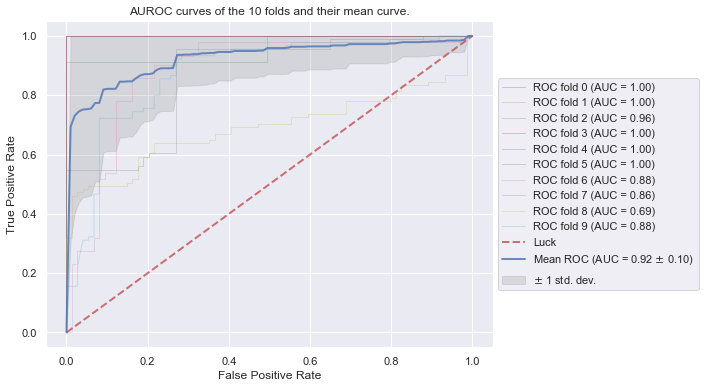

The full auc score is 0.9226980588933452.
The std of the mean auc score is 0.09619801200760757.

The time it took for making and plotting the mean curve is 3.862147331237793.


In [18]:
# use make_and_plot_AUROC with XGB
make_and_plot_AUROC(best_clf_XGB, test_x, test_y, RF=False, shuffle=False, save_name='XGB')

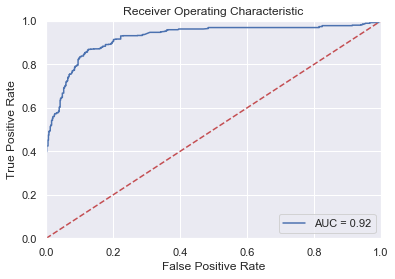

In [20]:
# actually predicting with xbooster
data_train = xgb.DMatrix(train_x, label=train_y)
data_test = xgb.DMatrix(test_x, label=test_y)
                        
# get the booster instance after training
modelx = best_clf_XGB.train(best_params, data_train, 
                              number_of_iterations["after_function_param"]+5)

pickle.dump(modelx, open("xgboost_model.dat", "wb"))

# get the predictions
probas_ = modelx.predict(data_test)
            
# turn the predictions into correct format
probas_ = np.array([(1-x, x) for x in probas_])

# create roc curve
probs = modelx.predict(data_test)
preds = probs
fpr, tpr, threshold = metrics.roc_curve(test_y, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
            